# CIFAR-10 Photo Classification

#### The goal of this project is to develop a deep convolutional neural network model from scratch for the CIFAR-10 object classification dataset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images. [Dataset Reference](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf): Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.


# The Data

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [0]:
import pandas as pd
import numpy as np

In [5]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [0]:
import matplotlib.pyplot as plt

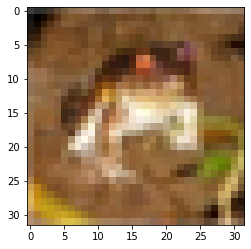

In [9]:
# FROG
plt.imshow(x_train[0])

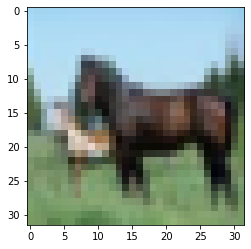

In [10]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [11]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
x_train[0].shape

(32, 32, 3)

In [13]:
x_train.max()

255

In [0]:
x_train = x_train/225

In [0]:
x_test = x_test/255

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [0]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(50000, 1)

In [20]:
y_train[0]

array([6], dtype=uint8)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [22]:
y_cat_train.shape

(50000, 10)

In [23]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [40]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 165us/sample - loss: 1.5180 - accuracy: 0.4540 - val_loss: 1.4663 - val_accuracy: 0.4782
Epoch 2/15
50000/50000 [==============================] - 8s 150us/sample - loss: 1.1630 - accuracy: 0.5944 - val_loss: 1.2079 - val_accuracy: 0.5800
Epoch 3/15
50000/50000 [==============================] - 8s 151us/sample - loss: 1.0167 - accuracy: 0.6471 - val_loss: 1.0321 - val_accuracy: 0.6439
Epoch 4/15
50000/50000 [==============================] - 7s 148us/sample - loss: 0.9168 - accuracy: 0.6838 - val_loss: 1.1321 - val_accuracy: 0.6150
Epoch 5/15
50000/50000 [==============================] - 7s 150us/sample - loss: 0.8376 - accuracy: 0.7120 - val_loss: 1.0080 - val_accuracy: 0.6633
Epoch 6/15
50000/50000 [==============================] - 7s 148us/sample - loss: 0.7756 - accuracy: 0.7358 - val_loss: 1.0939 - val_accuracy: 0.6395
Epoch 7/15
50000/50000 [==========================

In [0]:
model.save('cifar_first_model.h5')

In [0]:
losses = pd.DataFrame(model.history.history)

In [43]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.517999,0.45404,1.466254,0.4782
1,1.162996,0.59436,1.207887,0.5800
2,1.016747,0.64714,1.032060,0.6439
3,0.916768,0.68382,1.132112,0.6150
4,0.837646,0.71200,1.008026,0.6633


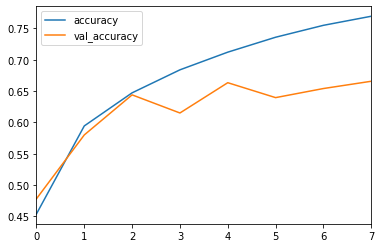

In [44]:
losses[['accuracy','val_accuracy']].plot()

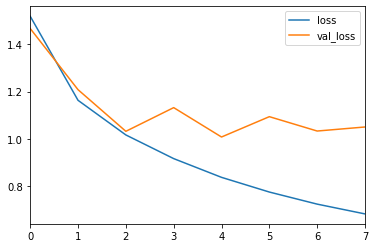

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0503360431671143, 0.6656]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1000
           1       0.78      0.79      0.78      1000
           2       0.69      0.49      0.57      1000
           3       0.53      0.43      0.48      1000
           4       0.64      0.61      0.63      1000
           5       0.61      0.56      0.58      1000
           6       0.85      0.65      0.74      1000
           7       0.65      0.76      0.70      1000
           8       0.71      0.79      0.75      1000
           9       0.61      0.83      0.70      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



In [50]:
confusion_matrix(y_test,predictions)

array([[734,  28,  15,   6,   7,   4,   5,   8, 128,  65],
       [ 33, 789,   3,   2,   2,   2,   5,   4,  28, 132],
       [115,  17, 491,  58,  89,  69,  35,  62,  24,  40],
       [ 48,  20,  56, 435,  80, 160,  32,  72,  30,  67],
       [ 45,   9,  49,  52, 610,  42,  24, 114,  23,  32],
       [ 35,   5,  31, 147,  46, 560,   9, 104,  21,  42],
       [ 22,  12,  36,  77,  75,  28, 654,  23,  24,  49],
       [ 27,  10,  20,  26,  32,  43,   5, 759,   8,  70],
       [ 75,  59,   5,  10,   6,   7,   2,   1, 794,  41],
       [ 29,  69,   4,   8,   2,   5,   0,  12,  41, 830]])

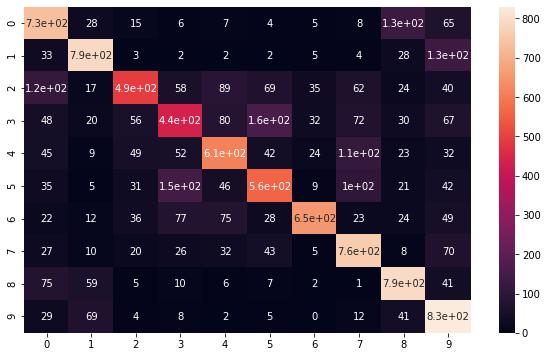

In [51]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [0]:
my_image = x_test[16]

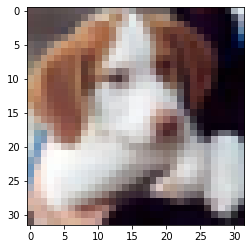

In [0]:
plt.imshow(my_image)

In [0]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])

In [0]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html

# Improve Model

In [0]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [0]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
early_stop2 = EarlyStopping(monitor='val_loss',patience=10)

In [35]:
model2.fit(x_train,y_cat_train,epochs=500,validation_data=(x_test,y_cat_test),callbacks=[early_stop2])

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 205us/sample - loss: 1.9369 - accuracy: 0.2781 - val_loss: 1.7293 - val_accuracy: 0.3694
Epoch 2/500
50000/50000 [==============================] - 10s 192us/sample - loss: 1.5634 - accuracy: 0.4273 - val_loss: 1.3844 - val_accuracy: 0.4952
Epoch 3/500
50000/50000 [==============================] - 10s 196us/sample - loss: 1.3908 - accuracy: 0.4970 - val_loss: 1.3552 - val_accuracy: 0.5133
Epoch 4/500
50000/50000 [==============================] - 10s 196us/sample - loss: 1.2694 - accuracy: 0.5453 - val_loss: 1.1421 - val_accuracy: 0.5950
Epoch 5/500
50000/50000 [==============================] - 10s 192us/sample - loss: 1.1709 - accuracy: 0.5773 - val_loss: 1.0750 - val_accuracy: 0.6206
Epoch 6/500
50000/50000 [==============================] - 10s 190us/sample - loss: 1.0909 - accuracy: 0.6086 - val_loss: 1.0155 - val_accuracy: 0.6408
Epoch 7/500
50000/50000 [=============

In [0]:
model2.save('cifar_improved_model.h5')

In [0]:
losses2 = pd.DataFrame(model2.history.history)

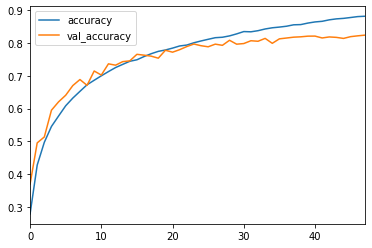

In [54]:
losses2[['accuracy','val_accuracy']].plot()

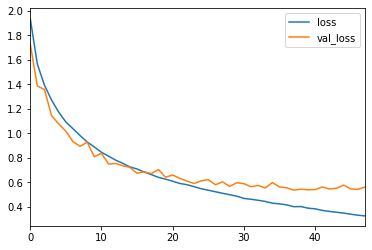

In [55]:
losses2[['loss','val_loss']].plot()

In [56]:
print(model2.metrics_names)
print(model2.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.5594424263954163, 0.8245]


In [57]:
predictions = model2.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.92      0.91      0.91      1000
           2       0.82      0.71      0.76      1000
           3       0.70      0.61      0.65      1000
           4       0.75      0.85      0.80      1000
           5       0.70      0.77      0.74      1000
           6       0.83      0.89      0.86      1000
           7       0.85      0.88      0.87      1000
           8       0.92      0.90      0.91      1000
           9       0.92      0.87      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



# Summary

In [59]:
print('First Model Accuracy:    ', model.evaluate(x_test,y_cat_test,verbose=0)[1])
print('Improved Model Accuracy: ', model2.evaluate(x_test,y_cat_test,verbose=0)[1])

First Model Accuracy:     0.6656
Improved Model Accuracy:  0.8245
